# Evaluating Kicker Performance Using KER

#### Matt Taylor, Dev Patel, Anand Ramaka, Yanzhen Shen

#### University of Illinois at Urbana-Champaign

# Introduction

$\qquad$ NFL's kickers are important. Whether it's making a field goal in the clutch to win a game or for an early lead, kickers have one simple job, yet it can be one of the most mentally challenging positions in football. In this project, we will try to gain insight into the situational factors that influence whether a field goal is made or not and create a new metric called Kicker Excellence Rating (KER). KER ranks individual kickers for their "clutchness", describing how well they perform in different situations. Here we define clutchness as making a kick in a critical moment in a game. Not all field goals are created equally, so we wanted to account for the difficulty of each kick when ranking the kickers themselves. Different kicks have varying degrees of "clutchness" due to score difference, time in the game, distance of the kick, wind speed, and temperature. First, we will create a model that can classify whether a field goal is made or not independent of the player. This will allow us to measure the difficulty of the kick based on situational factors. We will then create another model that classifies whether a field goal is made with player specific information. By comparing the two models, we will be able to answer the following questions:

- How clutch is a particular kick?

- Who are some of the most clutch kickers in the NFL?

$\qquad$ This new metric could have far reaching impact. It could tell a coach if they should put their kicker in a particular scenario or if they should turn to other options. It could also be used to create salary expectations of a kicker’s worth if they are performing their jobs in crucial moments. Finally, when teams are trying to select kickers in free agency or off waivers, they can turn to this metric to get a better evaluation of the kicker performance to see if they are the best fit for their team. 

<p>
   <img src="https://media.giphy.com/media/KpCuqMDLODQQ7pYLYd/giphy.gif" alt>
   <em>Brett Maher of the Dallas Cowboys makes a 62 yard field goal against the New York Jets down 21 to 3 to end the first half. [3]
</em>
</p>

# Design

$\qquad$The team decided to break the design into three stages as shown in the table below. The first stage involves determining a kicker agnostic baseline in order to find the probability of a field goal being made. The second stage takes a similar approach, however this time considering additional player-specific statistics. More specifically, stage 2 assigns a kicker’s name as well as their height and weight to the field goal event to get a more accurate probability for a particular kicker. The third stage uses the first two stages to create the KER grouped by different categories. 

|Stage|Name|Description|
|---|---|---|
|1.|Baseline Field Goal Probability|Finds the probability of a successful field goal independent of the player. This gives a baseline for how an average kicker in the NFL performs.|
|2.|Kicker Deterministic Field Goal Probability|Finds the probability of a successful field goal dependent on the player. |
|3.|KER|Determines a metric from [-1, 1] measuring the quality of a kicker in relation to field goal attempts. A score of 0 is neutral, meaning the kicker performs at par with the baseline.|


$\qquad$It’s important to note that the data for NFL field goals is highly unbalanced when classifying a make or a miss. Using the data provided, about 83.9% of field goals were makes in the 2018 through 2020 NFL seasons. The team decided to use this as the baseline of the stage 1 and 2 models, where any prediction better than 83.9% accuracy outperforms the majority class. Data was split into train, validation and test sets, stratified by the label of a made or missed field goal. This ensured that the sets contained equal proportions of each class despite the data being unbalanced. Finally, the 2018, 2019, and 2020 seasons were assumed to have identical field goal conditions and consistent rules allowing for the team to combine all seasons of kick data into one cohesive dataset. [Weather data](https://www.kaggle.com/tombliss/weather-data) by Tom Bliss along with play and player tracking data were used to create and understand the new metric.

## Stage 1

$\qquad$Stage 1 uses a feed forward neural network to give a baseline probability of a field goal being made.  Some notable inputs that we believe impact a successful field goal are kick length, time remaining in the game, difference in score, wind, temperature, and weather conditions such as clear skies, light rain, heavy rain, or snow [3]. Kick length is obvious because as distance increases, field goal accuracy decreases. A less obvious factor is time remaining in the game. Imagine it’s a 2-point game, the fourth quarter and there are seconds remaining in the game. A field goal in these conditions is difficult no matter the distance because of the pressure placed on the kicker. 


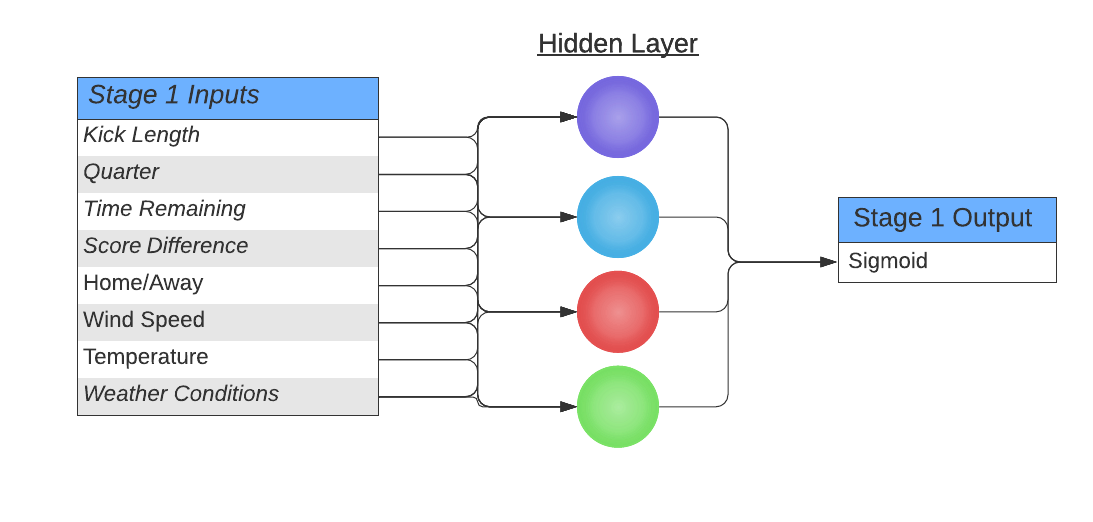

$\qquad$After these inputs are fed through our model, we used a sigmoid activation function as seen in the equation below. This compresses the output of the data to a probability of a successful field goal, ranging from 0 to 1 as seen in the equation below. A probability of 1 shows that the model is 100% confident that the kick is a make and vice versa for a 0. 

$$F(x) = \frac{1}{1+e^{-x}}$$

## Stage 2

$\qquad$Stage 2 uses a similar FFNN as stage 1, but fine-tuned for the additional player dependent features. Additional features added are the player and their height and weight. Players with less than 25 field goals in the 2018-2020 seasons were filtered out of the dataset in order to evaluate the more active kickers in the NFL. The inputs were fed through a hidden layer and output as a probability of FGM similar to stage 1.


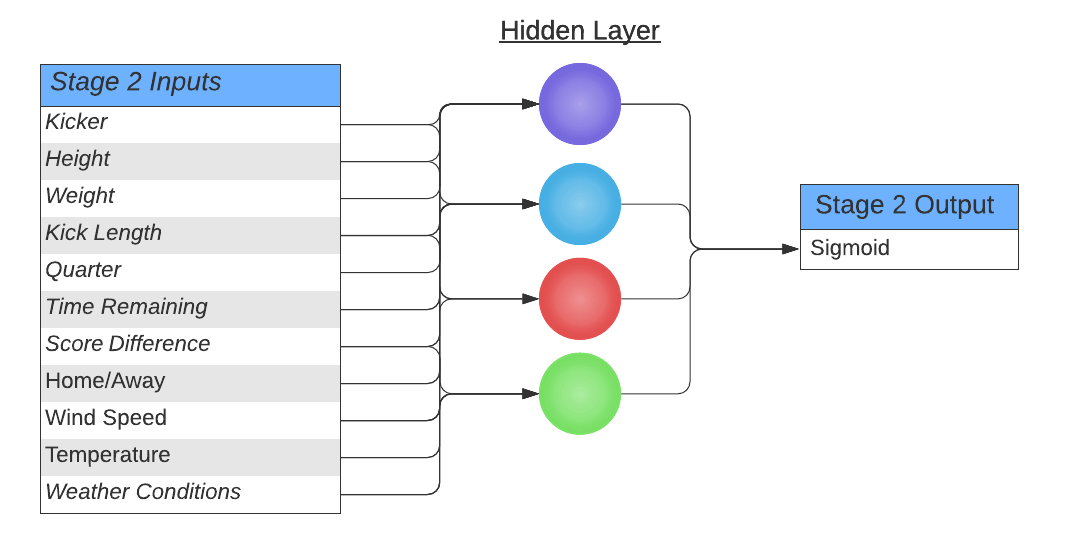

### Model Evaluation Metrics

$\qquad$While minimizing loss and achieving high accuracy is always an important goal in any ML model, it doesn’t always tell the full story. The team decided to use the area under the curve receiver operating characteristics (AUC-ROC) metric along with a loss vs epoch curve to evaluate how well the model performed with train and validation sets. ROC plots the true positive rate against the false positive rate while AUC explains how separable the two classes are. The loss vs epoch curve explains how well our model represents the data and if it is overfitting. Due to the imbalance in the dataset, we also attempted to use cost-sensitive analysis [1]; using a larger class weight for missed field goals in hopes of increasing the true negative rate (TNR) and reducing type-1 errors (false positives). 

## Stage 3

$\qquad$Stage 3 is quite simple but powerful. The first stage gives a baseline for the probability of FGM while the second stage gives a probability of FGM dependent on each kicker. Stage 3 subtracts the output of stage 1 ($S_1$) from stage 2 ($S_2$), creating a score of the range of -1 to 1. We decided to subtract in this way because it makes a positive number represent that the kicker performs above average, with a 1 being the best possible score. The majority of kickers will lie near a score of 0, while a select few will be outliers. When converted to standard-normal coordinates, players with a KER above 1 standard deviation are regarded as exceptional kickers in their evaluation category while players with a standardized KER of less than -1 are deemed as underperformers.

$$KER= S_2-S_1$$

$\qquad$KER can be categorized by any one of the model’s important features. The team decided to categorize KER by field goal distance and by score difference. These two categories will tell fans and coaches how well certain kickers perform at long distances and explains who is more likely to make a field goal when the score is within a 3-point game. There are, however, many more options in choosing how to categorize KER. For example, KER could be categorized by time remaining in the game. This could show who performs better with seconds remaining in the game compared to in the beginning of a game.


# Results

$\qquad$Stages 1 and 2 performed only slightly better in average accuracy compared to the baseline, mainly because both models fell to the curse of overfitting. 5-fold cross validation was used in hopes to reduce overfitting, creating accuracies of 86% with some folds. When we added the player information to our model in stage 2, the precision of our model increased, meaning the model was able to correctly predict more successful field goal attempts. Both specificities (true negative rates) were also low, showing that cost-sensitive analysis with class-weights didn’t drastically reduce type 1. 


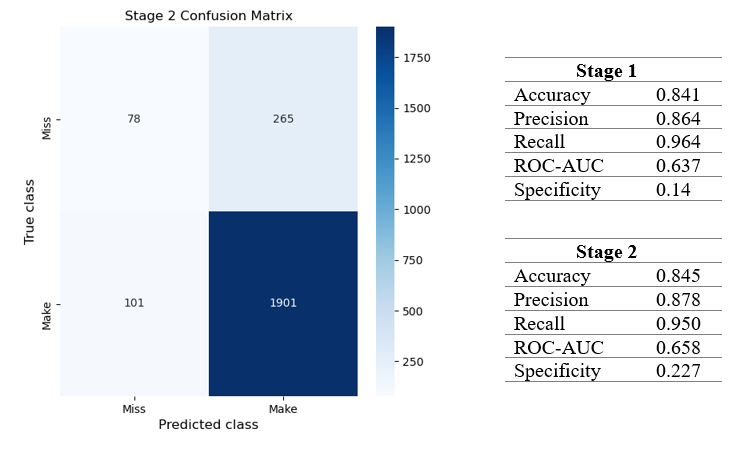

$\qquad$We categorized KER by kick distance as seen above. As the distance of the kick increases, there is greater variance in the KER. This suggests that situational factors such as wind, temperature, and time remaining will affect the kicker more as the distance of the kick increases. Certain players are naturally better in dealing with these situational factors as seen in the visualization. Looking at the standardized KER plots below, Chris Boswell was a top performer at the 30-39 yard range. Our model also showed that he is a top performer when it’s a 3-point game, making him an ideal candidate in these conditions. KER also provides a deeper insight into a player's game. For example, Tyler Bass, a highly touted kicker, performs at a below average level in kicks longer than 30 yards.

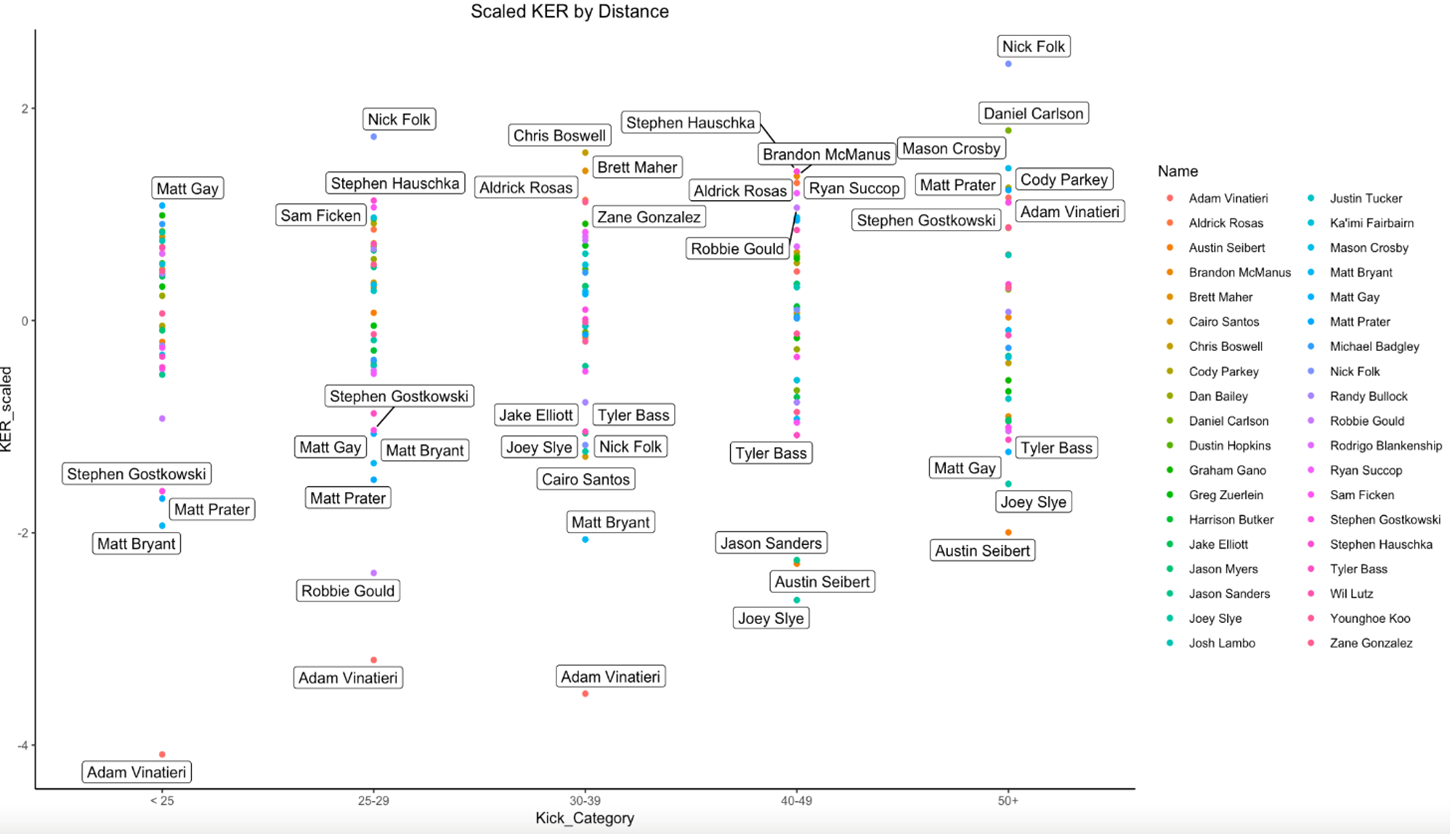

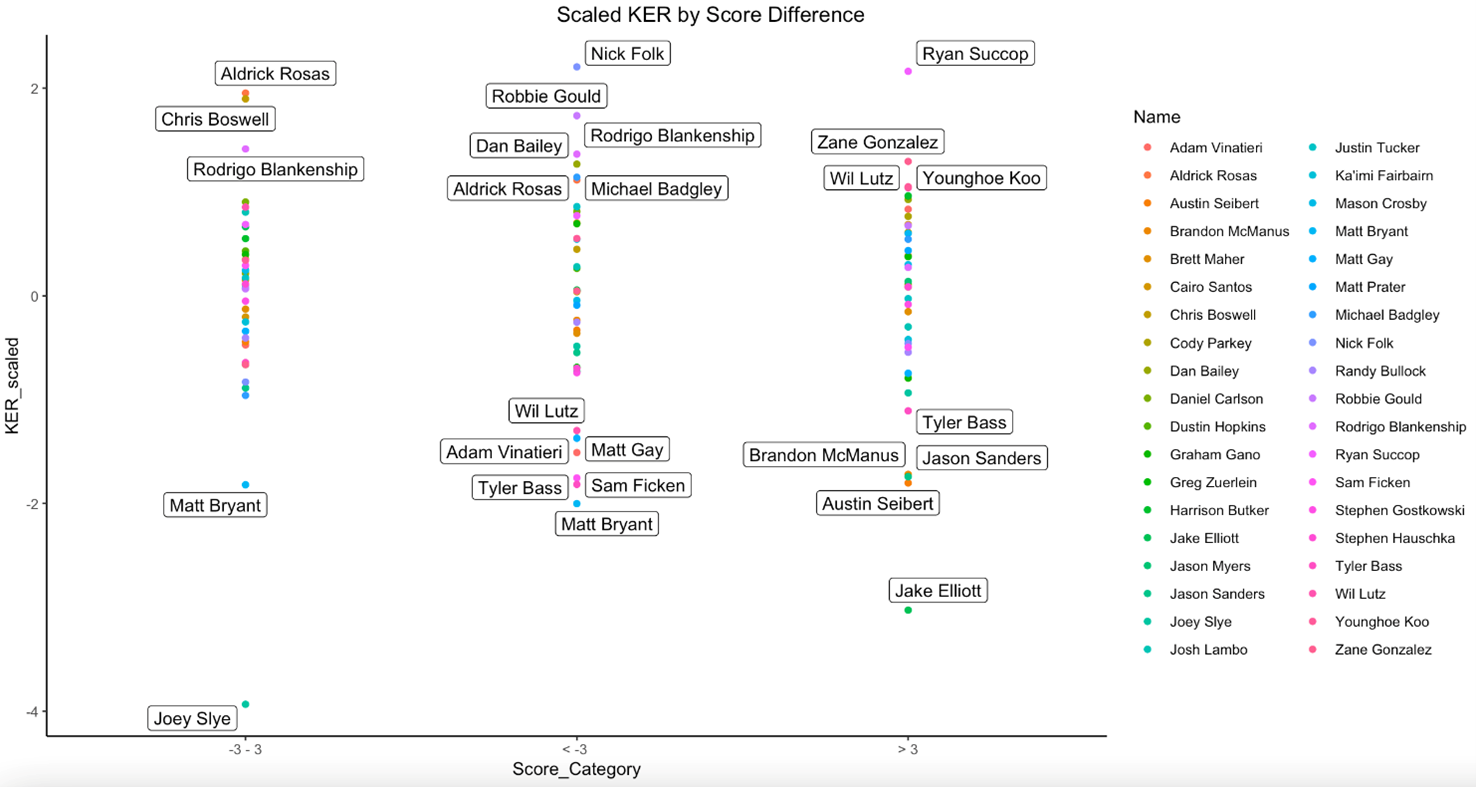

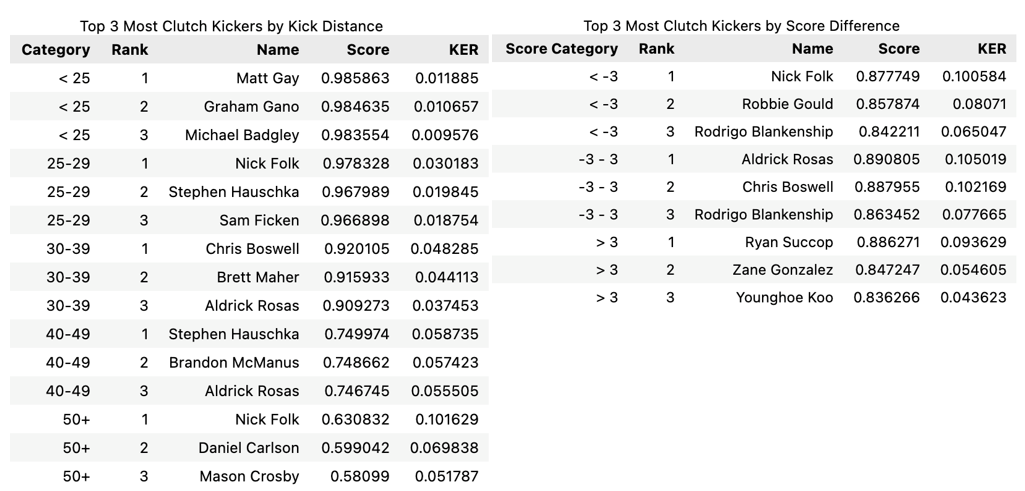

# Future Work

$\qquad$One area that could improve KER is the accuracy of the predictions. This lower accuracy was likely caused by the imbalance in the amount of made field goals versus missed field goals. Because a kicker was far more likely to make a field goal than to miss a field goal, there was insufficient data on missed field goals. This resulted in many type-1 errors in our model, where missed field goals were classified much less often than they should’ve been.

$\qquad$Additionally, there are ways that the handling of our inputs differently. For one, we could’ve treated time remaining and score difference as a combined statistic to better gauge the pressure on the kicker. For example, the overall clutchness of a kick with a low score difference and a high time remaining is higher than a kick with a high score difference and a low time difference.

$\qquad$On top of that, there are some additional factors that could’ve been added onto our existing model. We did not account for the direction of the wind, even though we took the wind speed into account. This could have a great effect on the data because wind in the direction of the goal post could improve the field goal, while crosswinds would hurt the field goal.



# Conclusion

$\qquad$KER could prove essential for both NFL teams and the millions of viewers who regularly tune in to games. On one hand, this metric could be used by coaches to evaluate kickers. This could prove useful in free agency when assessing what contracts to give to different kickers. Additionally, our metric could be used to assess which kicker to place in a crunch time situation between the primary and the secondary kicker on a team. A situation may arise where the starting kicker is more consistent, but the secondary kicker performs better in key moments. This metric could also be used by casual viewers of the NFL, not just NFL coaches. Whether it be to determine which player would be more suitable in a fantasy football draft, or how it would affect betting odds, this metric could provide a deeper insight into which kicker performs better in high leverage moments. 


# References
[1]$\quad$ Buda, Mateusz, et al. “A Systematic Study of the Class Imbalance Problem in Convolutional Neural Networks.” Neural Networks, vol. 106, 2018, pp. 249–259., https://doi.org/10.1016/j.neunet.2018.07.011. 

[2]$\quad$Bliss, Tom. (2021, October). Weather Data, Version 1. Retrieved 2021, December from https://www.kaggle.com/tombliss/weather-data.

[3]$\quad$Kyun Shin, Baek. (2021, October). NFL Big Data Bowl Basic EDA, Version 12. Retrieved November, 2021 from https://www.kaggle.com/werooring/nfl-big-data-bowl-basic-eda-for-beginner?scriptVersionId=76703169&cellId=81

[4]$\quad$Nakamura, Akio. (2017, December). Precision Recall Curve with Keras. Retrieved December 2021 from https://medium.com/@akionakas/precision-recall-curve-with-keras-cd92647685e1


# Appendix

## Code

[Github](https://github.com/mht3/BigDataBowl2022)


## Contact Us

[Matt Taylor](https://www.linkedin.com/in/matthtaylor/)
, [Dev Patel](https://www.linkedin.com/in/dev-patel-b6b5b0212)
, [Anand Ramaka](https://www.linkedin.com/in/aramaka/)
, [Yanzhen Shen](mailto:yzshen@me.com)
